In [1]:
import sys
print("python version: ", sys.version)

import pandas as pd
print("pandas version: ", pd.__version__)

import numpy as np
print('numpy version: ', np.__version__)

import scipy as sp
print('scipy version: ', sp.__version__)

import sklearn as skl
print('sklearn version: ', skl.__version__)

import matplotlib.pyplot as plt

import seaborn as sns

#sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))

#config = tf.ConfigProto()
#config.gpu_options.allow_growth = True
#sess = tf.Session(config=config)

#import theano as th
#print('theano version: ', th.__version__)

import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.metrics import roc_curve, auc, f1_score, accuracy_score, precision_recall_curve

import os
import random

python version:  3.7.3 (default, Mar 27 2019, 22:11:17) 
[GCC 7.3.0]
pandas version:  0.24.2
numpy version:  1.16.4
scipy version:  1.3.0
sklearn version:  0.21.2


In [2]:
excel_file = r'geriomop-data-from-egems-paper-UPDATED-COL-FIX-ATC_2-and-behavior-change-022819.tsv'
df = pd.DataFrame(pd.read_csv(excel_file, sep='\t'))
print(df.shape)

(7584, 208)


# Missing value means not relevant
### One Hot Encoding (All zero stands for NA)
* "Mds-fall-2-6-months-to-admission", "Mds-fall-last-month-to-admission", "mds-pain-last-five-days" (Y/N/U/NA)
* "mds-long-term-memory-ok", "mds-short-term-memory-ok", "mds-staff-assess-pain", "mds-delirium-scale", "recent-start-other-fall-risk-rx" (Y/N/NA)
* "mds-pressure-ulcer-stage-X", (X=1, 2, 3, 4) (Y/NA)

### Label Encoding & Sin, Cos Transform (NA: (0, 0))
* "mds-cognitive-scale": 
  - 'Independent': 0, 
  - 'Modified Independence': 1, 
  - 'Moderately Impaired': 2, 
  - 'Severely Impaired': 3
* "mds-pain-freq-last-five-days": 
  - 'Continuous': 4, 
  - 'Frequent': 3, 
  - 'Occasional': 2, 
  - 'Rare': 1, 
  - 'Unable to respond': 0,
* "mds-pain-intensity": 
  - 'None': 0, 
  - 'Mild': 1, 
  - 'Moderate': 2, 
  - 'Severe': 3, 
  - 'Very severe, horrible': 4
* "Psychotropic-X": Number
* (Added) "Psychotropic-X-Period": Number


# Drop features

* ~~"Unnamed: 51"~~, 
* ~~"pk-interaction", "pk-interaction-type"~~ 
* ~~"object-drug-1", "object-drug-1-dose", "object-drug-1-effective-dose-increase", "object-drug-1-effective-dose", "interaction-1-stop-date"~~, 
* ~~"object-drug-2", "object-drug-2-dose", "object-drug-2-effective-dose-increase", "object-drug-2-effective-dose", "interaction-2-stop-date"~~
* "ws-sudden-stop", "ws-sudden-stop-drugs", "ws-prolonged-psychotropics", "mds-toilet-prgm-atmptd"
* "Blank-1", "Deleted-X" (X from 1 to 12), "Psychotropic-X-average-daily-dose", "Psychotropic-X-Start/End-date"
* "Entry-discharge-type"

# Encode features (originally) with no missing values

### Date-related Transform

* episodePeriod = episode-end-date - episode-start-date
* stayPeriod = stay-end-date - stay-start-date

### Drop Date-related Features

* "episode-start-date", "episode-end-date", "stay-start-date", "stay-end-date", "predictor-date", "projected-date"

### Binary Encoding (Y/N)

* "cms-long-stay", "mds-stay-trans-short-to-long",
* "mds-antianxiety-medication", "mds-antidepressant-medication", "mds-antipsychotic-medication", "mds-antibiotic-medication",
* "mds-anticoagulant-medication", "mds-diuretic-medication", "mds-hypnotic-medication",
* "mds-behavioral-symptoms", "mds-behavioral-symptoms-to-others", "mds-dehydrated", "mds-depression", "mds-fever",
* "mds-impaired-mobility", "mds-impaired-transfer", "mds-internal-bleeding", "mds-malnutrition", "mds-no-problem-conditions",
* "mds-vomiting", "mds-impaired-walk-in-room", "mds-impaired-walk-in-corridor", "mds-impaired-locomot-unit", "mds-impaired-locomot-other",
* "ws-antibiotic-anticoag-coexposure",
* "ws-psychotropic-with-not-ordered-weight-loss", "ws-diuretic-adl"

### One Hot Encoding

* "race", "facility", "gender", "mds-bims-summary-ranking", "ws-meclizine-psych-coexposure", 

### Drop Feature
* "PPS-assessment", "Federal-assessment"

### Mapping

* mds-pain-non-verbal {'None/Mild':0,'Moderate/Severe':1}

# Features need imputation
### One Hot Encoding

1. Binary categories (Yes/No/NA)
   * "pneumonia", "uti", "mdro", "anemia", "septicemia", "constipation", 
   * "wound", "hyponatremia", "hyperkalemia", "embolisms", 
   * "alzheimers", "anxiety", "depression", "non-alz-dimentia", 
   * "bipolar", "parkinsons", "psychosis", "schizophrenia", "seizure", "aphasia", "emphysema", 
   * "arthritis", "ashd", "bph", "cancer", "cerebralpalsy", "stroke", "cirrhosis", "comatose", 
   * "diabetes", "dysrhythmias", "gerd", "heart-failure", "hemiplegia/hemiparesis", "hepatitis", 
   * "huntingtons", "hyperlipidemia", "hyperthyroidism", "hypothyroidism", "hypertension", 
   * "hypotension", "multiple-sclerosis", "neurogenic-bladder", "obstructive-uropathy", 
   * "osteoporosis", "paraplegia", "ptsd", "pvd", "quadriplegia", "thyroid-disorder", 
   * "tourettes", "transient-ischemic-attack", "traumatic-brain-injury", "tuberculosis", "renal-failure", 

   * "mds-delirium-scale", "mds-pain-medication", "mds-received-pain-tx-non-pharm ", "mds-received-prn-pain-medication",
   * "mds-conduct-staff-assessment-mental-status", "mds-pressure-ulcer-prsnt", "conduct_bims", "acute_mental_change",
   * "conduct_pain_assmnt", "cane_or_crutch_past_7_days", "walker_past_7_days", "wheelchair_past_7_days", 
   * "limb_prosthesis_past_7_days", "no_listed_mobility_device", 


2. Other categories

   * "marital-status": 
     - "Never Married", "Married", "Widowed", "Separated", "Divorced"
   * "mds-entered-from": 
     - "Acute Hospital", "Psychiatric Hospital", "Another nursing home or swing bed", "Hospice", "Inpatient rehabilitation facility"
     - "Community (private home/apt., board/care, assisted living, group home)",  "Other", 
   * "mds-excess-weight-loss": 
     - "Yes - prescribed", "Yes - not prescribed", "No or unknown"
   * "balance_while_standing", "balance_while_walking", "balance_turning_around", "balance_toileting", "balance_bed_to_chair"
     - "Steady at all times", "able to stabilize without assistance", "able to stabilize with assistance", "Activity did not occur"
    
### Label Encoding
* "mds-urinary-incontinence"
  - "Always continent": 0, 
  - "Occasionally incontinent": 1,
  - "Frequently incontinent": 2,
  - "Always incontinent": 3,
  - "Catheter - not rated": (0, 0)


* "cam_inattention",
* "cam_disorganized_thought",
* "cam_altered_conc",
* "cam_motor_retardation"
  - "Behavior not present": 0,
  - "Behavior present, fluctuates": 1, 
  - "Behavior continuously present": 2, 

   
* "functlimit_rom_upper", 
* "functlimit_rom_lower"
   - "No impairment": 0, 
   - "Impairment on one side": 1, 
   - "Impairment on both sides": 2 


* "does_resident_wander"
   - "Behavior not exhibited": 0, 
   - "1 to 3 days": 1, 
   - "4 to 6 days": 2, 
   - "occurred daily": 3,

# Features from new dataset
* "atc_X" (X from 1 to 5) - drop in strategy 1
* "number_of_behavior_changes" - keep
* "min_effective_dose_X" - drop
* "psych_sdd_X" - drop in strategy 1

In [3]:
# Get atc codes
atc_list = []
for i in range(1, 6):
    atc_list.append(df.groupby('atc_%d' % i)['min_effective_dose_%d' % i].first())
atc_codes = pd.concat(atc_list)
atc_codes = atc_codes[~atc_codes.index.duplicated()].index.tolist()

# Fill missing min_effective_dose
atc_dic = [('N03AE01', 0.5), ('N05AB04', 15), ('N05AX13', 3), ('N05CD04', 1), ('N06AX21', 60), ('N06AX24', 20), \
           ('N06AX23', 50)]
for code, dose in atc_dic:
    for i in range(1, 6):
        df.loc[df['atc_%d' % i] == code, 'psych_sdd_%d' % i] = \
            df.loc[df['atc_%d' % i] == code, 'Psychotropic-%d-average-daily-dose' % i] / dose

# Set sdd=0 to NA
for i in range(1, 6):
    df.loc[df['psych_sdd_%d' % i] == 0, 'psych_sdd_%d' % i] = np.nan

In [4]:
# drop feature
def drop_features(df, f):
    df.drop(f, axis=1, inplace=True)

In [5]:
# one hot encoding
def one_hot_encoding(df, features, categories):
    for f, c in zip(features, categories):
        df[f] = df[f].astype('category', categories=c)
    return pd.get_dummies(df, columns=features, prefix=features)

In [6]:
# compute date difference
def date_diff(start, end):
    return (pd.to_datetime(end) - pd.to_datetime(start)) / np.timedelta64(1, 'D')

In [7]:
# generate date diff features
def generate_period(df, f):
    for start, end, period in f:
        df[period] = date_diff(df[start], df[end])
        df.drop([start, end], axis=1, inplace=True)

In [8]:
# label encoding
def label_encoding(df, features, dictionaries):
    for f, dic in zip(features, dictionaries):
        df[f] = df[f].map(dic)

In [9]:
# sin&cos transform
def col_transform(df, col, mmax, mmin, df_ref=None):
    if(mmax <= mmin):
        # for test set, if max&min not set, use training set value
        if(df_ref is not None): 
            mmax = df_ref[col].max()
            mmin = df_ref[col].max()
        else:
            mmax = df[col].max()
            mmin = df[col].min()
    angle = 0.25 * np.pi * (df[col] - mmin) / (mmax - mmin) + 0.125 * np.pi
    return (np.cos(angle), np.sin(angle))

def df_transform(df, f, df_ref=None):
    for col, mmax, mmin in f:
        df[col + '_x'], df[col + '_y'] = col_transform(df, col, mmax, mmin, df_ref)
        df[col + '_x'].fillna(0, inplace=True)
        df[col + '_y'].fillna(0, inplace=True)
        df.drop(col, axis=1, inplace=True)

In [10]:
# train test split
from sklearn.model_selection import GroupShuffleSplit
def train_test_split(df, target, groupby, radio, random_state):
    train_idx, test_idx = next(GroupShuffleSplit(train_size=radio, test_size=1-radio, random_state=random_state).split(df, target, df[groupby]))
    return df.iloc[train_idx], df.iloc[test_idx], target.iloc[train_idx], target.iloc[test_idx]

In [11]:
# missing data describe
def missing_summary(df):
    missing_cnt = df.isna().sum()
    missing_data = pd.concat([missing_cnt, missing_cnt/df.shape[0]], axis=1, keys=['count', 'percentage'])
    return missing_data[missing_data['percentage'] != 0].sort_values(by='percentage', ascending=False)

In [12]:
# Drop features
f_drop = ["Blank-1", "ws-sudden-stop", "ws-sudden-stop-drugs", "ws-prolonged-psychotropics", "mds-toilet-prgm-atmptd"] + \
         ['Deleted-%d' % i for i in range(1, 13)] + ['Psychotropic-%d' % i for i in range(1, 6)] + \
         ['Psychotropic-%d-average-daily-dose' % i for i in range(1, 6)] + ["Entry-discharge-type"]

f_drop += ["acute_mental_change", "aphasia", "balance_toileting", "balance_turning_around", "bipolar", "bph", \
           "cam_motor_retardation", "cerebralpalsy", "cirrhosis", "cms-long-stay", "comatose", "conduct_pain_assmnt",\
           "dysrhythmias", "embolisms", "facility", "hemiplegia/hemiparesis", "hepatitis", "huntingtons", "hyperkalemia",\
           "hypertension", "hyperthyroidism", "hyponatremia", "hypotension", "hypothyroidism", \
           "limb_prosthesis_past_7_days", "marital-status", "mds-conduct-staff-assessment-mental-status", \
           "mds-dehydrated", "mds-delirium-scale", "mds-excess-weight-loss", "mds-long-term-memory-ok", \
           "mds-pressure-ulcer-stage-1", "mds-pressure-ulcer-stage-2", "mds-pressure-ulcer-stage-3", \
           "mds-pressure-ulcer-stage-4", "mds-short-term-memory-ok", "mds-staff-assess-pain", "multiple-sclerosis", \
           "neurogenic-bladder", "obstructive-uropathy", "paraplegia", "pneumonia", "ptsd", "pvd", "quadriplegia", \
           "renal-failure", "schizophrenia", "septicemia", "stroke", "tourettes", "traumatic-brain-injury", \
           "tuberculosis", "wound", "ws-antibiotic-anticoag-coexposure", "ws-diuretic-adl", \
           "ws-meclizine-psych-coexposure", "ws-meclizine-psych-coexposure", "ws-meclizine-psych-coexposure",\
           "ws-meclizine-psych-coexposure", "ws-meclizine-psych-coexposure", \
           "ws-psychotropic-with-not-ordered-weight-loss", "ws-tramadol-antidepressant-coexposure"]
 
# Missing value means not relevant
f_one_hot = ["Mds-fall-2-6-months-to-admission", "Mds-fall-last-month-to-admission", "mds-pain-last-five-days", \
             "recent-start-other-fall-risk-rx"]
cate_one_hot = [['Yes', 'No', 'Unable to answer']] * 3 + [['Yes', 'No']]

f_period = [("Psychotropic-%d-Start-date" % i, 'Psychotropic-%d-End-date' % i, 'Psychotropic-%d-Period' % i) for i in range(1, 6)]

f_label = ['mds-cognitive-scale', 'mds-pain-freq-last-five-days', 'mds-pain-intensity']
dic_label = [{'Independent': 0, 'Modified Independence': 1, 'Moderately Impaired': 2, 'Severely Impaired': 3}, \
             {'Continuous': 4, 'Frequent': 3, 'Occasional': 2, 'Rare': 1, 'Unable to respond': 0}, \
             {'None': 0, 'Mild': 1, 'Moderate': 2, 'Severe': 3, 'Very severe, horrible': 4}]

f_transform = [('mds-cognitive-scale', 3, 0), ('mds-pain-freq-last-five-days', 4, 0), ('mds-pain-intensity', 4, 0)] + \
              [('Psychotropic-%d-Period' % i, 0, 0) for i in range(1, 6)]

In [13]:
# Encode features (originally) with no missing values
f_drop += ["predictor-date", "projected-date", "PPS-assessment", "Federal-assessment"]

f_period += [('episode-start-date', 'episode-end-date', 'episode-period'),\
             ('stay-start-date', 'stay-end-date', 'stay-period')]

f_label += ["mds-stay-trans-short-to-long", "mds-antianxiety-medication", \
            "mds-antidepressant-medication", "mds-antipsychotic-medication", "mds-antibiotic-medication",
            "mds-anticoagulant-medication", "mds-diuretic-medication", \
            "mds-hypnotic-medication", "mds-behavioral-symptoms", "mds-behavioral-symptoms-to-others", \
            "mds-depression", "mds-fever", "mds-impaired-mobility", "mds-impaired-transfer", \
            "mds-internal-bleeding", "mds-malnutrition", "mds-no-problem-conditions", "mds-vomiting", \
            "mds-impaired-walk-in-room", "mds-impaired-walk-in-corridor", "mds-impaired-locomot-unit", \
            "mds-impaired-locomot-other"] + ["mds-pain-non-verbal"]
dic_label += [{'Yes': 1, 'No': 0}] * 22 + [{'None/Mild':0,'Moderate/Severe':1}]

f_one_hot += ["race", "gender", "mds-bims-summary-ranking"]
cate_one_hot += [['White', 'Black', 'Other'], \
                 ['Female', 'Male'], ['Intact or Moderately Intact', 'Moderate Impairment']]

In [14]:
# Features need imputation
f_one_hot += ["uti", "mdro", "anemia", "constipation", "alzheimers", "anxiety", "depression", "non-alz-dimentia", \
              "parkinsons", "psychosis", "seizure", "emphysema", "arthritis", "ashd", "cancer", "diabetes", "gerd",\
              "heart-failure", "osteoporosis", "thyroid-disorder", "transient-ischemic-attack", "mds-pain-medication", \
              "mds-received-pain-tx-non-pharm", "mds-received-prn-pain-medication", "mds-pressure-ulcer-prsnt", \
              "conduct_bims", "cane_or_crutch_past_7_days", "walker_past_7_days", "wheelchair_past_7_days", \
              "no_listed_mobility_device", "hyperlipidemia"] + \
              ["balance_while_standing", "balance_while_walking", "balance_bed_to_chair"] + ["mds-entered-from"]
cate_one_hot += [['Yes', 'No']] * 31 + \
                [["Steady at all times", "able to stabilize without assistance", \
                  "able to stabilize with assistance", "Activity did not occur"]] * 3 + \
                [["Acute Hospital", "Psychiatric Hospital", "Another nursing home or swing bed", "Hospice", \
                  "Inpatient rehabilitation facility",
                  "Community (private home/apt., board/care, assisted living, group home)", "Other"]]

f_label += ["mds-urinary-incontinence", "functlimit_rom_upper", "functlimit_rom_lower", "does_resident_wander"] + \
           ["cam_inattention", "cam_disorganized_thought", "cam_altered_conc"]
dic_label += [{"Always continent": 0, "Occasionally incontinent": 1, "Frequently incontinent": 2,\
               "Always incontinent": 3, "Catheter - not rated": np.nan}] + \
             [{"No impairment": 0, "Impairment on one side": 1, "Impairment on both sides": 2}] * 2 + \
             [{"Behavior not exhibited": 0, "1 to 3 days": 1, "4 to 6 days": 2, "occurred daily": 3}] + \
             [{"Behavior not present": 0, "Behavior present, fluctuates": 1, "Behavior continuously present": 2}] * 3

f_transform += [("mds-urinary-incontinence", 3, 0), ("cam_inattention", 2, 0), ("cam_disorganized_thought", 2, 0), \
                ("cam_altered_conc", 2, 0), ("functlimit_rom_upper", 2, 0), \
                ("functlimit_rom_lower", 2, 0), ("does_resident_wander", 3, 0)]

In [15]:
# Features from new dataset
f_drop += ["min_effective_dose_%d" % i for i in range(1, 6)]

f_one_hot += ["atc_%d" % i for i in range(1, 6)]
cate_one_hot += [atc_codes] * 5

f_transform += [('psych_sdd_%d' % i, 0, 0) for i in range(1, 6)]

In [16]:
# generate target
target = df['outcome-Mds-fall-since-prior-assessment'].map({'None': 0, 'Yes': 1})
dff = df.drop(['outcome-mds-fall-no-injury', 'outcome-mds-fall-minor-injury', 'outcome-mds-fall-major-injury', \
               'outcome-Mds-fall-since-prior-assessment', 'outcome-riskmaster-fall-incident'], axis=1)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(dff, target, 'patient-id', 0.7, 0)
print('Total number of patients: %d' % len(df.groupby('patient-id')))
print('Number of patients in training set: %d' % len(X_train.groupby('patient-id')))

Total number of patients: 3133
Number of patients in training set: 2193


In [18]:
%%time
generate_period(X_train, f_period)
label_encoding(X_train, f_label, dic_label)
X_train_original = X_train.copy() # store value range
df_transform(X_train, f_transform)
X_train = one_hot_encoding(X_train, f_one_hot, cate_one_hot)
drop_features(X_train, f_drop)

CPU times: user 1min 7s, sys: 1.39 s, total: 1min 8s
Wall time: 14.1 s


In [19]:
X_train_use = X_train.copy()

In [20]:
print(X_train.dtypes[X_train.dtypes == 'object'].index)

Index([], dtype='object')


In [21]:
missing_summary(X_train_use)

,count,percentage


In [22]:
%%time
generate_period(X_test, f_period)
label_encoding(X_test, f_label, dic_label)
df_transform(X_test, f_transform, X_train_original)
X_test = one_hot_encoding(X_test, f_one_hot, cate_one_hot)
drop_features(X_test, f_drop)

CPU times: user 10.6 s, sys: 24 ms, total: 10.7 s
Wall time: 10.7 s


In [23]:
X_test_use = X_test.copy()

In [24]:
print(X_train.dtypes[X_train.dtypes == 'object'].index)

Index([], dtype='object')


In [25]:
missing_summary(X_train_use)

,count,percentage


In [26]:
X_train_use.shape

(5301, 398)

In [27]:
X_test_use.shape

(2283, 398)

In [28]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from numpy.random import seed
from tensorflow import set_random_seed

Using TensorFlow backend.


In [29]:
def find_best_f1(y_predict, y_true):
    fpr, tpr, thresholds = roc_curve(y_true, y_predict, pos_label=1) 
    max_f1, th = 0, 0
    for threshold in thresholds:
        f1 = f1_score(y_true, y_predict > threshold)
        if(f1 > max_f1):
            max_f1 = f1
            th = threshold
    return max_f1, th

In [30]:
# drop patient ID for basic models

from sklearn.preprocessing import MinMaxScaler

def scaler_transform(X_train_use, X_test_use):    
    scaler = MinMaxScaler(feature_range=(0, 1)).fit(X_train_use.drop('patient-id', axis=1))
    X_train_transformed = pd.DataFrame(scaler.transform(X_train_use.drop('patient-id', axis=1)), \
                                       columns=X_train_use.columns[1:], index=X_train_use.index)                                   
#     X_train_transformed['patient-id'] = X_train_use['patient-id']
    X_test_transformed = pd.DataFrame(scaler.transform(X_test_use.drop('patient-id', axis=1)), \
                                       columns=X_test_use.columns[1:], index=X_test_use.index) 
#     X_test_transformed['patient-id'] = X_test_use['patient-id']
    return X_train_transformed, X_test_transformed

In [31]:
X_train_transformed, X_test_transformed = scaler_transform(X_train_use, X_test_use)

In [32]:
#X_train_transformed

# Basic Model Experiment: Use non-missing values to train model

In [33]:
from sklearn import preprocessing ## for standarScaler
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pandas.core.frame import DataFrame
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import (GradientBoostingClassifier, GradientBoostingRegressor,RandomForestClassifier, RandomForestRegressor)
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import *
from sklearn.model_selection import *
from sklearn.svm import LinearSVC

In [34]:
def metrics_m_prob (model,X_train_transformed,X_test_transformed,y_train,y_test):
    Model = model.fit(X_train_transformed, y_train)
    prediction=Model.predict(X_test_transformed)
    accuracy=accuracy_score(y_test,prediction)
    precision=precision_score(y_test, prediction) # get precision score
    recall=recall_score(y_test, prediction) # get recall score
    F1=f1_score(y_test, prediction) # get F1 score

    tn, fp, fn, tp = confusion_matrix(y_test, prediction).ravel()
    specificity=float(tn) / (tn+fp) # get specificity score
    prediction_prob=Model.predict_proba(X_test_transformed)
    prediction_prob=prediction_prob[:,1]
    fpr, tpr, tresholds = roc_curve(y_test, prediction_prob)
    roc_auc = sklearn.metrics.auc(fpr,tpr) # get auroc score

    dic_=  dict([('accuracy', accuracy), ('precision', precision), ('recall', recall),('F1',F1),('specificity', specificity),('AUROC', roc_auc)])
    dic_df=pd.DataFrame(pd.Series(dic_),columns=['Score'])
    dic_df=dic_df.reset_index().rename(columns={'index':'metrics'})
    
    
    
    f1, th = find_best_f1(prediction_prob, y_test)

    ## maximum F1
    y_threshold = prediction_prob > th
    tn, fp, fn, tp = confusion_matrix(y_test, y_threshold).ravel()

    
    dic_f1= dict([('accuracy', accuracy_score(y_test, y_threshold)), ('precision', precision_score(y_test, y_threshold)), ('recall', recall_score(y_test, y_threshold)),('F1',f1_score(y_test, y_threshold)),('specificity', (float(tn) / (tn+fp)))])
    dic_df_f1=pd.DataFrame(pd.Series(dic_f1),columns=['Score'])
    dic_df_f1=dic_df_f1.reset_index().rename(columns={'index':'metrics'})
   
    return dic_df,dic_df_f1,th


In [35]:
def metrics_m_pre (model,X_train_transformed,X_test_transformed,y_train,y_test):
    Model = model.fit(X_train_transformed, y_train)
    prediction=Model.predict(X_test_transformed)
    accuracy=accuracy_score(y_test,prediction)
    precision=precision_score(y_test, prediction) # get precision score
    recall=recall_score(y_test, prediction) # get recall score
    F1=f1_score(y_test, prediction) # get F1 score

    tn, fp, fn, tp = confusion_matrix(y_test, prediction).ravel()
    specificity=float(tn) / (tn+fp) # get specificity score
#     prediction_prob=Model.predict_proba(X_test_transformed)
#     prediction_prob=prediction_prob[:,1]
    fpr, tpr, tresholds = roc_curve(y_test, prediction)
    roc_auc = sklearn.metrics.auc(fpr,tpr) # get auroc score

    dic_=  dict([('accuracy', accuracy), ('precision', precision), ('recall', recall),('F1',F1),('specificity', specificity),('AUROC', roc_auc)])
    dic_df=pd.DataFrame(pd.Series(dic_),columns=['Score'])
    dic_df=dic_df.reset_index().rename(columns={'index':'metrics'})
    
    
    
    f1, th = find_best_f1(prediction, y_test)

    ## maximum F1
    y_threshold = prediction> th
    tn, fp, fn, tp = confusion_matrix(y_test, y_threshold).ravel()

    
    dic_f1= dict([('accuracy', accuracy_score(y_test, y_threshold)), ('precision', precision_score(y_test, y_threshold)), ('recall', recall_score(y_test, y_threshold)),('F1',f1_score(y_test, y_threshold)),('specificity', (float(tn) / (tn+fp)))])
    dic_df_f1=pd.DataFrame(pd.Series(dic_f1),columns=['Score'])
    dic_df_f1=dic_df_f1.reset_index().rename(columns={'index':'metrics'})
   
    return dic_df,dic_df_f1,th


In [36]:
def AUROC_Tain_prob(model,X_train_transformed,y_train):
    # training set
    Model = model.fit(X_train_transformed, y_train)
    # prediction=Model.predict(X_train_transformed)
    prediction_prob=Model.predict_proba(X_train_transformed)
    prediction_prob=prediction_prob[:,1]


    fpr, tpr, tresholds = roc_curve(y_train, prediction_prob)
    roc_auc = sklearn.metrics.auc(fpr,tpr) # get auroc score 
    return roc_auc

In [37]:
def AUROC_Tain_pre(model,X_train_transformed,y_train):
    # training set
    Model = model.fit(X_train_transformed, y_train)
    prediction=Model.predict(X_train_transformed)
#     prediction_prob=Model.predict_proba(X_train_transformed)
#     prediction_prob=prediction_prob[:,1]


    fpr, tpr, tresholds = roc_curve(y_train, prediction)
    roc_auc = sklearn.metrics.auc(fpr,tpr) # get auroc score 
    return roc_auc

In [38]:
def plot_roc_curve(fpr, tpr):
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()

In [39]:
def drawAUROC (model,figureName):
    Model = model.fit(X_train_transformed, y_train)
    prediction_prob=Model.predict_proba(X_test_transformed)
    prediction_prob=prediction_prob[:,1]
    fpr, tpr, tresholds = roc_curve(y_test, prediction_prob)

    f1, th = find_best_f1(prediction_prob, y_test)
    y_threshold = prediction_prob > th
    tn, fp, fn, tp = confusion_matrix(y_test, y_threshold).ravel()
    recall=recall_score(y_test, y_threshold)
    specificity=(float(tn) / (tn+fp))


    import csv 
    fpr, tpr, thresholds = roc_curve(y_test, prediction_prob, pos_label=1)
    plot_roc_curve(fpr, tpr)
    with open(figureName, "w") as writeFile:
        writer  = csv.writer(writeFile)
        writer.writerows([fpr, tpr, [recall, 1-specificity]])

In [40]:
from sklearn.calibration import calibration_curve
import csv 

def calibPlots (model,figureName):
    Model = model.fit(X_train_transformed, y_train)
    prediction_prob=Model.predict_proba(X_test_transformed)
    prediction_prob=prediction_prob[:,1]
    fraction_of_positives, mean_predicted_value = calibration_curve(y_test, prediction_prob, n_bins=10)
    with open(figureName, "w") as writeFile:
        writer  = csv.writer(writeFile)
        writer.writerows([fraction_of_positives, mean_predicted_value])

    plt.figure()
    plt.plot(mean_predicted_value, fraction_of_positives, 's-')
    plt.plot([0, 1], [0, 1], '--', color='gray')
    plt.show()


In [41]:
from sklearn.calibration import calibration_curve
import csv 

def calibPlots_normalized (model,figureName):
    Model = model.fit(X_train_transformed, y_train)
    prediction_prob=Model.predict_proba(X_test_transformed)
    prediction_prob=prediction_prob[:,1]
    fraction_of_positives, mean_predicted_value = calibration_curve(y_test, prediction_prob, normalize=True, n_bins=10)
    with open(figureName, "w") as writeFile:
        writer  = csv.writer(writeFile)
        writer.writerows([fraction_of_positives, mean_predicted_value])

    plt.figure()
    plt.plot(mean_predicted_value, fraction_of_positives, 's-')
    plt.plot([0, 1], [0, 1], '--', color='gray')
    plt.show()

# tuning hyperparameters for Decision Tree based on "roc_auc"

In [42]:
#parameters={'criterion':('gini','entropy'),'max_depth':[None,1,2,3,4,5,6,7,8,9,50,500,1000,5000], 'max_leaf_nodes':[None,2,3,5,6,7,8,9,10,100,200,300,500]}
#model = DecisionTreeClassifier(class_weight='balanced',random_state=100)
#clf = GridSearchCV(model, parameters,scoring='roc_auc',cv=5)
#clf.fit(X_train_transformed, y_train)
#print('The parameters of the best model are: ')

#print(clf.best_params_)
#y_pred = clf.predict(X_test_transformed)
#print(classification_report(y_test, y_pred))

In [43]:
clf_model=DecisionTreeClassifier(class_weight='balanced',max_leaf_nodes=8,criterion='entropy',max_depth=None,random_state=100)
results=metrics_m_prob(clf_model,X_train_transformed,X_test_transformed,y_train,y_test)

In [44]:
results[0]

,metrics,Score
0,accuracy,0.628997
1,precision,0.266366
2,recall,0.545035
3,F1,0.357847
4,specificity,0.648649
5,AUROC,0.639367


In [45]:
results[1]

,metrics,Score
0,accuracy,0.579501
1,precision,0.266608
2,recall,0.695150
3,F1,0.385403
4,specificity,0.552432


In [46]:
results[2]

0.3616892952085555

In [47]:

# training set
Model = DecisionTreeClassifier(class_weight='balanced',max_leaf_nodes=8,criterion='entropy',max_depth=None,random_state=100).fit(X_train_transformed, y_train)
# prediction=Model.predict(X_train_transformed)
prediction_prob=Model.predict_proba(X_train_transformed)
prediction_prob=prediction_prob[:,1]


fpr, tpr, tresholds = roc_curve(y_train, prediction_prob)
roc_auc = sklearn.metrics.auc(fpr,tpr) # get auroc score 
roc_auc

0.7201555819939491

In [48]:
pd.DataFrame(data=Model.feature_importances_, columns=['importance'], index=X_train_transformed.columns).sort_values(by=['importance'], ascending=False)

,importance
stay-period,0.520213
functlimit_rom_lower_x,0.219374
Psychotropic-1-Period_x,0.111451
balance_while_walking_Activity did not occur,0.064209
age,0.042452
cancer_No,0.042301
current-stay-days,0.000000
atc_3_N05AF04,0.000000
atc_3_N05AE04,0.000000
atc_3_N05AD01,0.000000


In [49]:
    print(X_train_transformed.columns, Model.feature_importances_)

Index(['current-stay-days', 'cumulative-days-in-facility',
       'mds-stay-trans-short-to-long', 'age', 'mds-antianxiety-medication',
       'mds-antidepressant-medication', 'mds-antipsychotic-medication',
       'mds-antibiotic-medication', 'mds-anticoagulant-medication',
       'mds-diuretic-medication',
       ...
       'atc_5_N06AB10', 'atc_5_N06AX05', 'atc_5_N06AX11', 'atc_5_N06AX12',
       'atc_5_N06AX16', 'atc_5_N06AX21', 'atc_5_N06AX24', 'atc_5_N05AA01',
       'atc_5_N05BA05', 'atc_5_N06AX23'],
      dtype='object', length=397) [0.         0.         0.         0.0424519  0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.52021298 0.         0.         0.
 0.         0.         0.         0.11145101 0.         0.
 0.         0.         0.         0.     

### Decision Tree AUROC curve

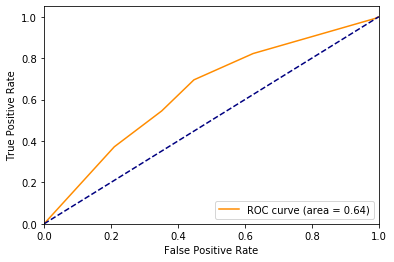

In [50]:
model=DecisionTreeClassifier(class_weight='balanced',max_leaf_nodes=8,criterion='entropy',max_depth=None,random_state=100) # DT
drawAUROC(model,'DT_exp_3.csv')

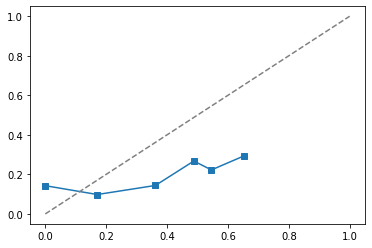

In [51]:
model=DecisionTreeClassifier(class_weight='balanced',max_leaf_nodes=8,criterion='entropy',max_depth=None,random_state=100)
calibPlots(model,'DT_exp_3_cal.csv')

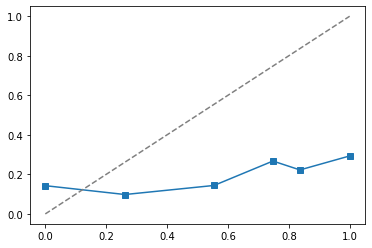

In [52]:
model=DecisionTreeClassifier(class_weight='balanced',max_leaf_nodes=8,criterion='entropy',max_depth=None,random_state=100)
calibPlots_normalized(model,'DT_exp_3_NorCal.csv')

In [53]:
prediction=Model.predict(X_test_transformed)

In [54]:
pred_list=prediction.tolist()

In [55]:
tn, fp, fn, tp = confusion_matrix(y_test, prediction).ravel()

In [56]:
tn

1200

In [57]:
fp

650

In [58]:
X_test_use['patient-id'].values

array([10379, 10385,  5032, ...,  9992,  9992,  9992])

In [59]:
m=X_test_use.columns.tolist()

In [60]:
print(m)

['patient-id', 'current-stay-days', 'cumulative-days-in-facility', 'mds-stay-trans-short-to-long', 'age', 'mds-antianxiety-medication', 'mds-antidepressant-medication', 'mds-antipsychotic-medication', 'mds-antibiotic-medication', 'mds-anticoagulant-medication', 'mds-diuretic-medication', 'mds-hypnotic-medication', 'mds-behavioral-symptoms', 'mds-behavioral-symptoms-to-others', 'mds-depression', 'mds-fever', 'mds-impaired-mobility', 'mds-impaired-transfer', 'mds-internal-bleeding', 'mds-pain-non-verbal', 'mds-malnutrition', 'mds-no-problem-conditions', 'mds-vomiting', 'cns-drug-exposure', 'psychotropic-exposure', 'mds-impaired-walk-in-room', 'mds-impaired-walk-in-corridor', 'mds-impaired-locomot-unit', 'mds-impaired-locomot-other', 'mds-adl-scale', 'psych_sdd_final', 'number_of_behavior_changes', 'episode-period', 'stay-period', 'mds-cognitive-scale_x', 'mds-cognitive-scale_y', 'mds-pain-freq-last-five-days_x', 'mds-pain-freq-last-five-days_y', 'mds-pain-intensity_x', 'mds-pain-intensit

In [61]:
X_test_use.shape

(2283, 398)

In [62]:
X_train_transformed.shape

(5301, 397)

In [63]:
k=X_test_transformed.columns.tolist()

In [64]:
print(k)

['current-stay-days', 'cumulative-days-in-facility', 'mds-stay-trans-short-to-long', 'age', 'mds-antianxiety-medication', 'mds-antidepressant-medication', 'mds-antipsychotic-medication', 'mds-antibiotic-medication', 'mds-anticoagulant-medication', 'mds-diuretic-medication', 'mds-hypnotic-medication', 'mds-behavioral-symptoms', 'mds-behavioral-symptoms-to-others', 'mds-depression', 'mds-fever', 'mds-impaired-mobility', 'mds-impaired-transfer', 'mds-internal-bleeding', 'mds-pain-non-verbal', 'mds-malnutrition', 'mds-no-problem-conditions', 'mds-vomiting', 'cns-drug-exposure', 'psychotropic-exposure', 'mds-impaired-walk-in-room', 'mds-impaired-walk-in-corridor', 'mds-impaired-locomot-unit', 'mds-impaired-locomot-other', 'mds-adl-scale', 'psych_sdd_final', 'number_of_behavior_changes', 'episode-period', 'stay-period', 'mds-cognitive-scale_x', 'mds-cognitive-scale_y', 'mds-pain-freq-last-five-days_x', 'mds-pain-freq-last-five-days_y', 'mds-pain-intensity_x', 'mds-pain-intensity_y', 'Psychot

In [65]:
pid_list=(X_test_use['patient-id'].values).tolist()

In [66]:
len(pred_list)

2283

In [113]:
true_list=y_test.to_list()

In [114]:
pid_loc_pred = pd.DataFrame(np.column_stack([pid_list, pred_list, true_list]), 
                               columns=['patient-id', 'DT', 'true outcome'])

In [117]:
pid_loc_pred['compare'] = pid_loc_pred['DT'] == pid_loc_pred['true outcome']

In [119]:
pid_loc_pred.loc[pid_loc_pred['compare']]

,patient-id,DT,true outcome,compare
0,10379,0,0,True
1,10385,0,0,True
2,5032,0,0,True
3,5032,0,0,True
4,5032,0,0,True
8,5074,1,1,True
9,5074,1,1,True
10,5074,1,1,True
13,5136,1,1,True
22,5170,0,0,True


In [118]:
pid_loc_pred

,patient-id,DT,true outcome,compare
0,10379,0,0,True
1,10385,0,0,True
2,5032,0,0,True
3,5032,0,0,True
4,5032,0,0,True
5,5074,1,0,False
6,5074,1,0,False
7,5074,1,0,False
8,5074,1,1,True
9,5074,1,1,True


In [70]:
type(pred_list)

list

In [71]:
pred_list[500]

1

In [72]:
len(pid_list)

2283

In [73]:
#make histogram of predictions
import numpy as np
import random
import matplotlib.pyplot as plt

my_list=pred_list
label = ['True','False']
def plot_bar_x():
    index = np.arange(len(label))
    plt.bar(index, my_list)
    plt.xlabel('result', fontsize=5)
    plt.ylabel('pred_list', fontsize=5)
    plt.xticks(index, label, fontsize=5, rotation=30)
    plt.title('test plot')
    plt.show()    

In [74]:
#plt.bar(np.arange(len(pred_list)), 2 , width=0.8, bottom=None, align='center', data=pred_list)

In [75]:
help(plt.bar)

Help on function bar in module matplotlib.pyplot:

bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)
    Make a bar plot.
    
    The bars are positioned at *x* with the given *align*\ment. Their
    dimensions are given by *width* and *height*. The vertical baseline
    is *bottom* (default 0).
    
    Each of *x*, *height*, *width*, and *bottom* may either be a scalar
    applying to all bars, or it may be a sequence of length N providing a
    separate value for each bar.
    
    Parameters
    ----------
    x : sequence of scalars
        The x coordinates of the bars. See also *align* for the
        alignment of the bars to the coordinates.
    
    height : scalar or sequence of scalars
        The height(s) of the bars.
    
    width : scalar or array-like, optional
        The width(s) of the bars (default: 0.8).
    
    bottom : scalar or array-like, optional
        The y coordinate(s) of the bars bases (default: 0).
    
    align : {'cent

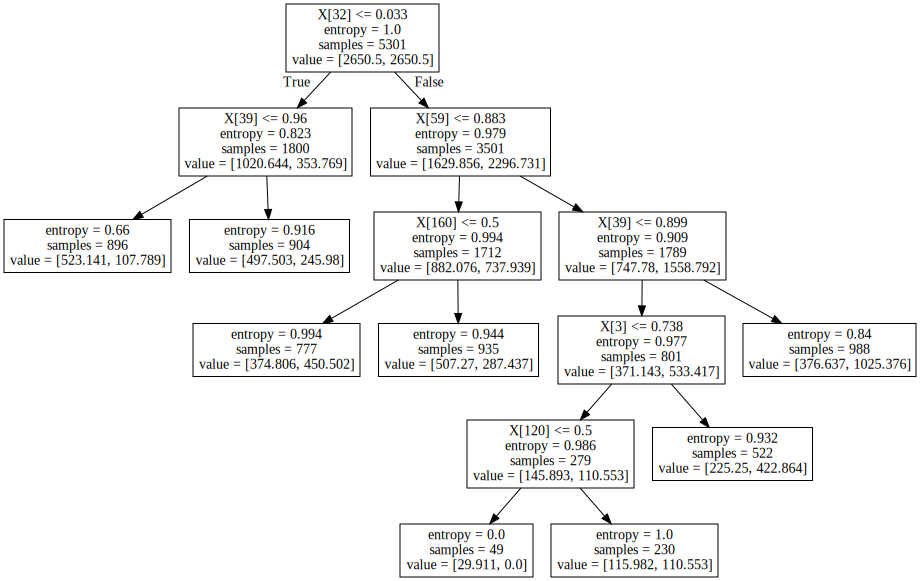

In [76]:
import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz
#from sklearn.tree import DecisionTreeClassifier()
from sklearn import tree

#clf = DecisionTreeClassifier()
#clf.fit(X_train_transformed,y_train)
columns=list(X_train_transformed.columns)
dot_data = tree.export_graphviz(clf_model, out_file=None, feature_names=columns, class_names=True)
graph = graphviz.Source(dot_data)
graph.render("image", view=False)
f = open("classifier.txt", "w+")
f.write(dot_data)
f.close()
display(graphviz.Source(export_graphviz(clf_model)))

In [77]:
#pd.DataFrame(data=Model.feature_importances_, columns=['importance'], index=X_train_transformed.columns).sort_values(by=['importance'], ascending=False)

In [78]:
for i in [32,39, 59, 160, 39, 3, 120]: 
    print(X_train_transformed.columns.tolist()[i])

stay-period
Psychotropic-1-Period_x
functlimit_rom_lower_x
balance_while_walking_Activity did not occur
Psychotropic-1-Period_x
age
cancer_No


In [79]:
len(y_train.tolist())

5301

In [80]:
X_train_transformed.shape


(5301, 397)

In [81]:
#from StringIO import StringIO
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.tree.export import export_graphviz
#from sklearn.feature_selection import mutual_info_classif

#clf = DecisionTreeClassifier()
#clf.fit(X, y)

#feat_importance = clf.tree_.compute_feature_importances(normalize=False)
#print("feat importance = " + str(feat_importance))

#out = StringIO()
#out = export_graphviz(clf, out_file='test/tree.dot')

In [82]:
#clf = DecisionTreeClassifier()
#clf.fit(X_train_transformed,y_train)
#columns=list(X_train_transformed.columns)
#dot_data = tree.export_graphviz(clf,out_file=None,feature_names=columns,class_names=True)
#graph = graphviz.Source(dot_data)
#graph.render("image",view=False)
#f = open("classifier.txt","w+")
#f.write(dot_data)
#f.close()
#display(graphviz.Source(export_graphviz(clf)))